# Plotting

Visualizing data is a cornerstone of scientific and mathematical computing, allowing us to uncover patterns and communicate our findings effectively. Julia offers a rich ecosystem of plotting packages. In this notebook, we'll dive into one of the most popular and versatile ones: `Plots.jl`.

## Loading the Plots Package

Before we can create our first plot, we need to bring the `Plots.jl` package into our current Julia session. We do this with the `using` command:

In [1]:
# This command loads the Plots package, making its functions available to us.
using Plots

## Your First Plot: The Basics

Let's start by drawing some simple geometric shapes. The two fundamental functions you'll use are:

* `plot(x, y)`: This creates a **new** plot, drawing lines between the coordinates specified in the `x` and `y` vectors.
* `plot!(x, y)`: The `!` at the end signifies that this function **modifies** an existing plot. It adds new lines to the last plot you created.

In the example below, we'll draw a triangle and a square. Notice the workflow:
1.  **Initialize the Plot**: We first call `plot()` with some keyword arguments to set up the canvas. We aren't plotting any data yet, just defining the properties of our plot.
2.  **Add Data**: We then add our shapes to this existing plot using `plot!`.
3.  **Annotate**: Finally, we add labels and a title to make our plot informative, again using functions that end with `!`.

Here are some of the key properties we're using:
* `aspect_ratio = :equal`: Ensures that the x and y axes are scaled equally. This is crucial for geometry; it's what makes our square look like a square and not a rectangle!
* `grid = false`: Removes the background grid lines for a cleaner look.
* `legend = false`: Hides the data legend, as it's not needed for this particular example.
* `title!`, `xlabel!`, `ylabel!`: These mutating functions add a title and labels to the axes of the current plot.

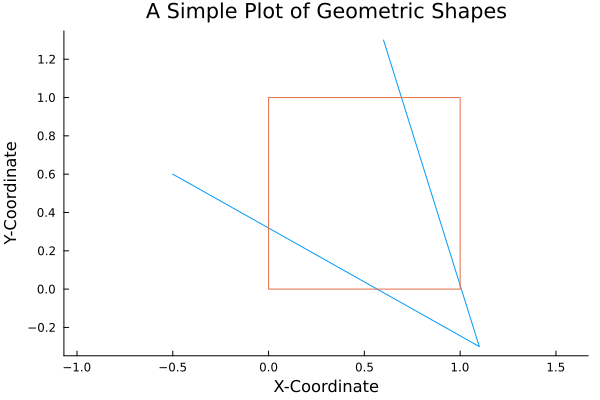

In [2]:
# Define the (x, y) coordinates for our two shapes.
# Note that for the square, we repeat the first point at the end to close the shape.
x_lines = [-.5, 1.1, 0.6]
y_lines = [.6, -.3, 1.3]
x_square = [0, 1, 1, 0, 0]
y_square = [0, 0, 1, 1, 0]

# Step 1: Initialize a new plot with our desired settings.
# This creates a blank canvas ready for our data.
plot(aspect_ratio = :equal, grid = false, legend = false)

# Step 2: Add our data series to the existing plot using the mutating plot! function.
plot!(x_lines, y_lines)
plot!(x_square, y_square)

# Step 3: Add descriptive labels to finalize the plot.
title!("A Simple Plot of Geometric Shapes")
xlabel!("X-Coordinate")
ylabel!("Y-Coordinate")

## Plotting Mathematical Functions

Beyond plotting raw data points, `Plots.jl` is excellent at visualizing mathematical functions, like $y = f(x)$. There are two primary approaches to this:

1.  **Direct Function Plotting**: You can pass the function object directly to the `plot` command. This is elegant and concise, letting the library handle the sampling of points.
2.  **Manual Sampling**: You can generate a set of x-values, compute the corresponding y-values by evaluating the function, and then plot the resulting `x` and `y` vectors. This gives you more control over the resolution of your plot.

Let's explore both methods.

### Method 1: Direct Function Plotting

Let's start by defining a base function, $f(x) = \sin(3x) + 0.5\sin(7x) - 0.1x$, and two transformations of it: $g(x) = f(x-3)$ and $h(x) = -0.7f(100/(10+x^2))$.

In [3]:
# Define our base function f(x).
f(x) = sin(3x) + 0.5sin(7x) - 0.1x

# Define g(x) as a horizontal shift of f(x).
g(x) = f(x - 3)

# Define h(x) as a more complex transformation of f(x).
h(x) = -0.7f(100/(10 + x^2))

h (generic function with 1 method)

Now, we can plot these functions directly by passing the function objects to `plot`. We also specify the interval over which to plot, in this case, from 0 to 10.

This example also introduces some useful options for customizing the appearance of your lines:
* `linewidth`: Controls the thickness of the line.
* `linecolor`: Sets the color of the line.
* `linestyle`: Changes the style (e.g., `:solid`, `:dash`, `:dot`).
* `label`: Assigns a name to each data series, which will appear in the plot's legend.

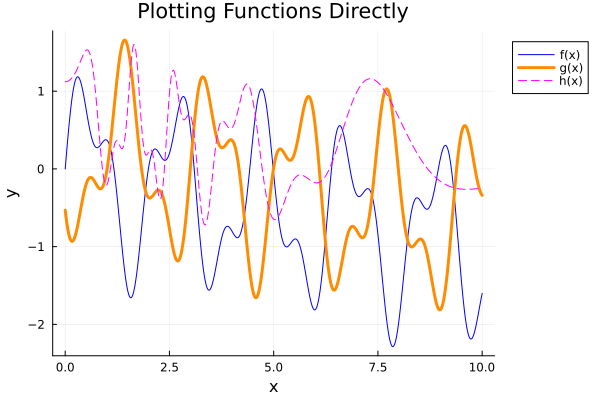

In [4]:
# Create the plot by passing the functions and the x-range.
# We can also apply customizations to each function's plot.
plot(
    [f, g, h], # An array of the functions to plot
    0, 10,     # The interval for x, from 0 to 10
    linewidth=[1 3 1],
    linecolor=[:blue :darkorange :magenta],
    linestyle=[:solid :solid :dash],
    title="Plotting Functions Directly",
    xlabel="x",
    ylabel="y",
    label=["f(x)" "g(x)" "h(x)"], # Row vector for labels
    legend=:outertopright
)

### Method 2: Manual Sampling

This approach gives us fine-grained control over our plot. The process is:
1.  **Create a domain**: Generate a vector of `x` values.
2.  **Apply the function**: Compute the corresponding `y` values for each `x`.
3.  **Plot the points**: Use `plot(x, y)` to visualize the result.

Let's try this with the function $k(x) = \cos(x) + 0.1\cos(10x) + 0.01\cos(100x)$ on the interval $[0, 2\pi]$. We'll use the `range` function to create our `x` values. `range(start, stop, length)` is perfect for this, as it creates a set of evenly spaced points.

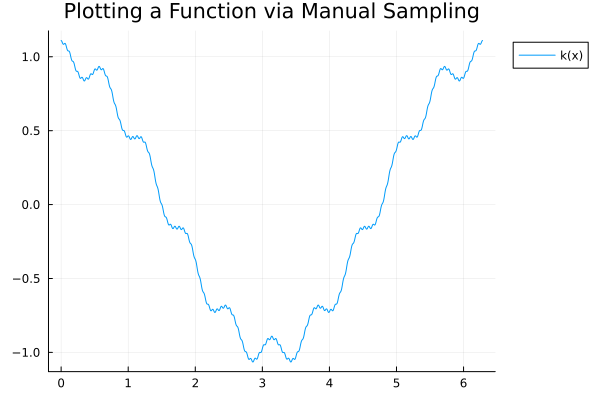

In [5]:
# Define our new function k(x).
k(x) = cos(x) + 0.1cos(10x) + 0.01cos(100x)

# 1. Create a domain of 1000 points from 0 to 2*pi.
# Using more points results in a smoother curve.
x = range(0, 2pi, length=1000)

# 2. Apply the function k to every element in x.
# The dot syntax k.(x) is called "broadcasting" and is a key feature of Julia.
# It efficiently applies the function to each item in the collection.
y = k.(x)

# 3. Plot the generated (x, y) coordinates.
plot(x, y, label="k(x)",
     title="Plotting a Function via Manual Sampling",
     legend=:outertopright)

## Parametric Plots

What if a curve is not a function of $y=f(x)$? Parametric plots come to the rescue! These are curves where the $x$ and $y$ coordinates are both functions of a third variable, often called $t$. So, we have $x = f(t)$ and $y = g(t)$.

Plotting a parametric curve in `Plots.jl` is straightforward. Instead of passing a function and an x-range, you provide the two functions for x and y, along with the range for the parameter $t$.

Let's visualize the famous "butterfly curve" to see this in action.

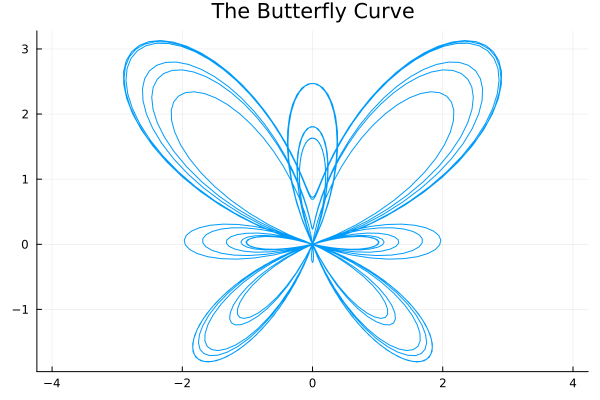

In [6]:
# Define the x and y components as separate functions of the parameter t.
fx(t) = sin(t)*(exp(cos(t)) - 2cos(4t) - sin(t/12)^5)
fy(t) = cos(t)*(exp(cos(t)) - 2cos(4t) - sin(t/12)^5)

# Generate the plot by sampling the two functions for a range of t values.
# Here, we plot over the interval [0, 12*pi] to get the full shape.
tt = range(0, 12π, 1000)
plot(fx.(tt), fy.(tt),
     linewidth=1, 
     legend=false, 
     aspect_ratio=:equal, 
     title="The Butterfly Curve")